<div style="text-align: center">

<b><h1>  </h1></b>
<h2> Assignment 5 - Twitter interaction analysis </h2>
<h2> Modern Information Retrieval Course </h2>
<h3> Dr. Asgari </h3>
<h3> Group Members </h3>
Parsa Mohammadian - 98102284
<br/>
Sara Azarnoush - 98170668
<br/>
Kahbod Aeini - 98101209 
<br/>
<br/>
Sharif University of Technology
<br/>
Computer Engineering Department
<hr/>
</div>

## Introduction
In this project we are asked to analyse interactions between some Twitter users and generate the interaction graph of these users.

After generating the desired graph, we can easily find the most refrenced user (a user with most refrences in the graph).

In [1]:
# importing modules
import networkx as nx
import matplotlib.pyplot as plt

### Dataset
Since we were not authorised to use a developer key, the project has been implemented on [Higgs](https://snap.stanford.edu/data/higgs-twitter.html) dataset. As explained in the attached link, this dataset contains certain files each implying a network of a specific type of interaction (such as favourite, reply, mention, etc). We only used Reply network since it is the only feasible dataset for the project (others may have huge size or type of interaction that is not of our use).

In [2]:
rfile = open("Datasets/higgs-reply_network.txt", 'r')
lines = rfile.readlines()

reply = []


for i in lines:

    lis = i.split()

    tmp1, tmp2 = int(lis[0]), int(lis[1])

    if tmp1 not in reply:
        reply.append(tmp1)

    if tmp2 not in reply:
        reply.append(tmp2)


Above we loaded the dataset and saved all the user ids in the reply array so as we can see below the number of users is 38918.

In [3]:
len(reply)

38918

### Graph Implementation
We implemented the graph using adjency matrix as in each cell we can see the number of interactions between two users of that row and column.
We designed both directed and undirected graphs so we can have two types of main users. In the undirected graph, the main user is the one who replied and had replies the most on aggregate. On the other hand in the directed graph, the main user is the one who have had been most replied to.

In [4]:
n = len(reply)

undirected_matrix = []
directed_matrix = []

for i in range(n+1):

    undirected_matrix.append([0 for j in range(n+1)])
    directed_matrix.append([0 for j in range(n+1)])


for i in range(n):

    undirected_matrix[0][i+1] = reply[i]
    undirected_matrix[i+1][0] = reply[i]
    directed_matrix[0][i+1] = reply[i]


In [5]:
indices = {}

for i in range(len(reply)):

    indices[reply[i]] = i+1

In [6]:
len(indices)

38918

In [7]:
for i in lines:

    line = i.split()
    node1, node2, edge = int(line[0]), int(line[1]), int(line[2])

    undirected_matrix[indices[node1]][indices[node2]] += edge
    undirected_matrix[indices[node2]][indices[node1]] += edge
    directed_matrix[indices[node1]][indices[node2]] += edge

### Main user detection
Now as we have the adjency matrices, it is easy to detect the user with most refrences (replies).

Below we iterate through both matrices and calculate total number of refrences for each user.

In [8]:
undirected_refrences = {}
directed_refrences = {}

for i in range(n):

    undirected_refrences[reply[i]] = sum(undirected_matrix[i+1][1:n+1])
    directed_refrences[reply[i]] = sum(directed_matrix[i+1][1:n+1])

In [9]:
undirected_refrences

{161345: 1,
 8614: 6,
 428368: 1,
 11792: 6,
 77904: 5,
 10701: 4,
 124554: 2,
 286277: 2,
 194873: 2,
 341375: 1,
 16460: 105,
 436133: 1,
 220: 496,
 274148: 2,
 274149: 2,
 12866: 4,
 22252: 2,
 425029: 1,
 35248: 16,
 126440: 1,
 39410: 8,
 279630: 1,
 179783: 1,
 107949: 1,
 322: 11,
 387599: 1,
 456: 13,
 158380: 1,
 52504: 1,
 201087: 2,
 191708: 2,
 345941: 1,
 345940: 1,
 402405: 2,
 190354: 2,
 3228: 6,
 13537: 2,
 126681: 1,
 88: 1324,
 27095: 1,
 8438: 7,
 245841: 1,
 138795: 2,
 30798: 1,
 318765: 1,
 3726: 24,
 424421: 1,
 49154: 3,
 57105: 9,
 188537: 1,
 146177: 2,
 129481: 2,
 351168: 2,
 30359: 1,
 4986: 10,
 256008: 2,
 79530: 1,
 188556: 2,
 455874: 3,
 2177: 67,
 20187: 9,
 28919: 1,
 53342: 1,
 53360: 1,
 307829: 1,
 358743: 1,
 271255: 6,
 220962: 7,
 307876: 1,
 377924: 1,
 310821: 2,
 1574: 43,
 67087: 3,
 7034: 2,
 427962: 1,
 12508: 4,
 222612: 2,
 144131: 2,
 55655: 1,
 72698: 2,
 288546: 1,
 41747: 1,
 316677: 1,
 395758: 1,
 130898: 6,
 11666: 10,
 426855:

In [10]:
directed_refrences

{161345: 1,
 8614: 2,
 428368: 1,
 11792: 0,
 77904: 3,
 10701: 2,
 124554: 1,
 286277: 1,
 194873: 1,
 341375: 1,
 16460: 4,
 436133: 1,
 220: 0,
 274148: 1,
 274149: 1,
 12866: 3,
 22252: 0,
 425029: 1,
 35248: 0,
 126440: 1,
 39410: 4,
 279630: 1,
 179783: 0,
 107949: 1,
 322: 0,
 387599: 1,
 456: 0,
 158380: 1,
 52504: 0,
 201087: 1,
 191708: 1,
 345941: 1,
 345940: 0,
 402405: 1,
 190354: 1,
 3228: 1,
 13537: 0,
 126681: 1,
 88: 0,
 27095: 1,
 8438: 1,
 245841: 1,
 138795: 2,
 30798: 0,
 318765: 1,
 3726: 2,
 424421: 1,
 49154: 2,
 57105: 3,
 188537: 1,
 146177: 1,
 129481: 1,
 351168: 1,
 30359: 1,
 4986: 0,
 256008: 2,
 79530: 0,
 188556: 2,
 455874: 3,
 2177: 1,
 20187: 2,
 28919: 0,
 53342: 1,
 53360: 0,
 307829: 1,
 358743: 0,
 271255: 6,
 220962: 0,
 307876: 1,
 377924: 0,
 310821: 2,
 1574: 0,
 67087: 3,
 7034: 0,
 427962: 1,
 12508: 0,
 222612: 1,
 144131: 1,
 55655: 1,
 72698: 0,
 288546: 1,
 41747: 0,
 316677: 1,
 395758: 0,
 130898: 5,
 11666: 2,
 426855: 1,
 677: 7,
 1

In [11]:
undirected_most_refrences = 0
undirected_main_user = 0

for i in undirected_refrences.keys():

    if undirected_refrences[i] > undirected_most_refrences:

        undirected_most_refrences = undirected_refrences[i]
        undirected_main_user = i

In [12]:
print(undirected_most_refrences)
print(undirected_main_user)

1324
88


Above we found out that the main user in undirected network is user with the 88 id with total replies of 1324.

In [13]:
directed_most_refrences = 0
directed_main_user = 0

for i in directed_refrences.keys():

    if directed_refrences[i] > directed_most_refrences:

        directed_most_refrences = directed_refrences[i]
        directed_main_user = i

In [14]:
print(directed_most_refrences)
print(directed_main_user)

50
9021


Above we found out that the main user in directed network is user with the 9021 id with total replies of 50.

### PageRank and HITS
Below we implement PageRank and HITS algorithm on our directed network and output the desired probability distributions.

Results may differ from the real answer since it is a probability distribution and is not supposed to give the correct answer of the network.

In [15]:
G = nx.DiGraph()
G.add_nodes_from(reply)

In [16]:
for i in lines:

    line = i.split()
    node1, node2, edge = int(line[0]), int(line[1]), int(line[2])

    for i in range(edge):
        G.add_edge(node1, node2)


In [17]:
def pagerank(G, alpha=0.99, personalization=None,
			max_iter=100, tol=1.0e-6, nstart=None, weight='weight',
			dangling=None):
	if len(G) == 0:
		return {}

	if not G.is_directed():
		D = G.to_directed()
	else:
		D = G

	# Create a copy in (right) stochastic form
	W = nx.stochastic_graph(D, weight=weight)
	N = W.number_of_nodes()

	# Choose fixed starting vector if not given
	if nstart is None:
		x = dict.fromkeys(W, 1.0 / N)
	else:
		# Normalized nstart vector
		s = float(sum(nstart.values()))
		x = dict((k, v / s) for k, v in nstart.items())

	if personalization is None:

		# Assign uniform personalization vector if not given
		p = dict.fromkeys(W, 1.0 / N)
	else:
		missing = set(G) - set(personalization)
		if missing:
			raise nx.NetworkXError('Personalization dictionary '
								'must have a value for every node. '
								'Missing nodes %s' % missing)
		s = float(sum(personalization.values()))
		p = dict((k, v / s) for k, v in personalization.items())

	if dangling is None:

		# Use personalization vector if dangling vector not specified
		dangling_weights = p
	else:
		missing = set(G) - set(dangling)
		if missing:
			raise nx.NetworkXError('Dangling node dictionary '
								'must have a value for every node. '
								'Missing nodes %s' % missing)
		s = float(sum(dangling.values()))
		dangling_weights = dict((k, v/s) for k, v in dangling.items())
	dangling_nodes = [n for n in W if W.out_degree(n, weight=weight) == 0.0]

	# power iteration: make up to max_iter iterations
	for _ in range(max_iter):
		xlast = x
		x = dict.fromkeys(xlast.keys(), 0)
		danglesum = alpha * sum(xlast[n] for n in dangling_nodes)
		for n in x:

			# this matrix multiply looks odd because it is
			# doing a left multiply x^T=xlast^T*W
			for nbr in W[n]:
				x[nbr] += alpha * xlast[n] * W[n][nbr][weight]
			x[n] += danglesum * dangling_weights[n] + (1.0 - alpha) * p[n]

		# check convergence, l1 norm
		err = sum([abs(x[n] - xlast[n]) for n in x])
		if err < N*tol:
			return x
	raise nx.NetworkXError('pagerank: power iteration failed to converge '
						'in %d iterations.' % max_iter)


In [18]:
page_rank_result = pagerank(G)

In [19]:
page_rank_result

{161345: 2.355112150564177e-06,
 8614: 4.000636627680111e-05,
 428368: 2.355112150564177e-06,
 11792: 1.8941036871397944e-05,
 77904: 8.510037367571895e-06,
 10701: 7.562541554395206e-06,
 124554: 0.0001725212399652349,
 286277: 0.0001725212399652349,
 194873: 0.0001725212399652349,
 341375: 2.355112150564177e-06,
 16460: 0.00019096540443692598,
 436133: 2.355112150564177e-06,
 220: 0.0011329440829057377,
 274148: 0.0001725212399652349,
 274149: 0.0001725212399652349,
 12866: 2.396456179624144e-05,
 22252: 1.5149446091089446e-05,
 425029: 2.355112150564177e-06,
 35248: 3.77887331160061e-05,
 126440: 2.355112150564177e-06,
 39410: 1.960056077108655e-05,
 279630: 2.355112150564177e-06,
 179783: 4.7165674808202985e-06,
 107949: 2.355112150564177e-06,
 322: 2.242748245774121e-05,
 387599: 2.355112150564177e-06,
 456: 1.4696527507497955e-05,
 158380: 2.355112150564177e-06,
 52504: 4.7165674808202985e-06,
 201087: 0.0001725212399652349,
 191708: 0.0001725212399652349,
 345941: 2.355112150564

In [20]:
page_rank_most_refrences = 0
page_rank_main_user = 0

for i in page_rank_result.keys():

    if page_rank_result[i] > page_rank_most_refrences:

        page_rank_most_refrences = page_rank_result[i]
        page_rank_main_user = i

In [21]:
print(page_rank_most_refrences)
print(page_rank_main_user)

0.03343985922771196
10836


c:\Users\Kahbod Aeini\AppData\Local\Programs\Python\Python310\lib\site-packages\networkx\algorithms\link_analysis\hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


Hub Scores:  {161345: -4.56591110612218e-22, 8614: 2.3642569565779907e-22, 428368: -2.4348389868495867e-22, 11792: -0.0, 77904: 7.107051785561278e-23, 10701: 4.9947037152461013e-23, 124554: -3.318817586882734e-23, 286277: -5.761021088639089e-26, 194873: -1.0590910829740041e-23, 341375: 9.566876568945518e-11, 16460: -5.282613738302955e-22, 436133: 5.8876090925105615e-06, 220: -0.0, 274148: 2.051208550123804e-23, 274149: -3.5021347799476784e-24, 12866: -3.32230280366564e-22, 22252: -0.0, 425029: 6.006841169353802e-17, 35248: -0.0, 126440: 1.1967152107038458e-22, 39410: 0.0007122944756931132, 279630: -3.37905682303163e-24, 179783: -0.0, 107949: -9.558996753314578e-23, 322: -0.0, 387599: 1.0384566933424478e-07, 456: -0.0, 158380: 1.8363773078669907e-23, 52504: -0.0, 201087: -3.743472037901691e-23, 191708: 1.558569094946452e-23, 345941: -1.87035667874857e-23, 345940: -0.0, 402405: 6.58112916306849e-24, 190354: -1.405428360173215e-24, 3228: -6.273050192491443e-23, 13537: -0.0, 126681: 0.0001

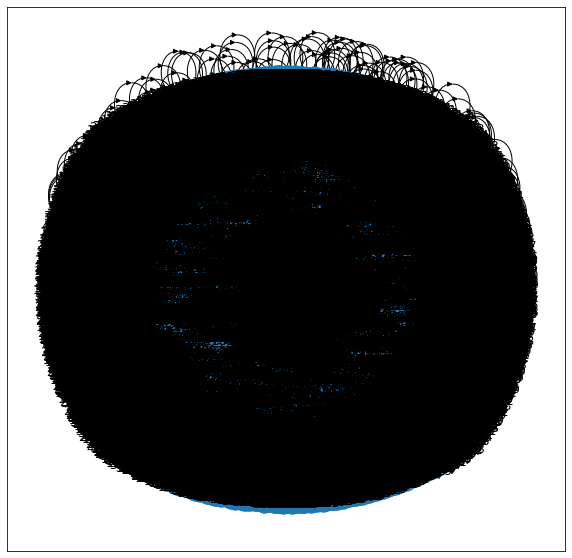

In [22]:
plt.figure(figsize =(10, 10))
nx.draw_networkx(G, with_labels = True)

hubs, authorities = nx.hits(G, max_iter = 50, normalized = True)

print("Hub Scores: ", hubs)
print("Authority Scores: ", authorities)
